In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_listings_md = pd.read_csv("./Madrid/listings.csv")
df_reviews_md = pd.read_csv("./Madrid/reviews.csv")
df_calendar_md = pd.read_csv("./Madrid/calendar.csv")
df_listings_bc = pd.read_csv("./Barcelona/listings.csv")
df_reviews_bc = pd.read_csv("./Barcelona/reviews.csv")
df_calendar_bc = pd.read_csv("./Barcelona/calendar.csv")

print(df_calendar_md.shape)
print(df_calendar_bc.shape)

(6682791, 7)
(5854542, 7)


# Data cleanup

**Make the study for one year. Keep data from '2022-03-10' to '2023-03-09'**

In [3]:
print(df_calendar_bc['date'].min())
print(df_calendar_bc['date'].max())
print(df_calendar_md['date'].min())
print(df_calendar_md['date'].max())

2022-03-10
2023-03-30
2022-03-10
2023-03-30


In [4]:
init_rows = df_calendar_md.shape[0]
df_calendar_md = df_calendar_md[df_calendar_md['date'] < '2023-03-10']
print(str(init_rows - df_calendar_md.shape[0]) + ' rows were removed. Now max date is ' + df_calendar_md['date'].max())


112766 rows were removed. Now max date is 2023-03-09


In [5]:
init_rows = df_calendar_bc.shape[0]
df_calendar_bc = df_calendar_bc[df_calendar_bc['date'] < '2023-03-10']
print(str(init_rows - df_calendar_bc.shape[0]) + ' rows were removed. Now max date is ' + df_calendar_bc['date'].max())

83505 rows were removed. Now max date is 2023-03-09


**Merge df_calendar with a subset of df_listings in order to get bedrooms column and keep only 'Entire home/apt' room_types**

In [6]:
df_listings_needed_md = df_listings_md.loc[df_listings_md['room_type'] == 'Entire home/apt', ['id', 'bedrooms']].rename(columns={'id': 'listing_id'})
df_listings_needed_bc = df_listings_bc.loc[df_listings_bc['room_type'] == 'Entire home/apt', ['id', 'bedrooms']].rename(columns={'id': 'listing_id'})

df_calendar_md = pd.merge(df_calendar_md, df_listings_needed_md, how='outer', on="listing_id")
df_calendar_bc = pd.merge(df_calendar_bc, df_listings_needed_bc, how='outer', on="listing_id")

In [7]:
df_calendar_md.shape

(6570025, 8)

**Cleanup bedrooms column -> nan values probably mean studios -> replace with 0**

In [8]:
init_rows = df_calendar_md['bedrooms'].isnull().sum()
df_calendar_md.loc[df_calendar_md['bedrooms'].isnull(), 'bedrooms'] = 0
print(str(init_rows - df_calendar_md['bedrooms'].isnull().sum()) + ' rows were updated')

2938503 rows were updated


In [9]:
init_rows = df_calendar_bc['bedrooms'].isnull().sum()
df_calendar_bc.loc[df_calendar_bc['bedrooms'].isnull(), 'bedrooms'] = 0
print(str(init_rows - df_calendar_bc['bedrooms'].isnull().sum()) + ' rows were updated')

2708910 rows were updated


**Keep only properties that have maximum 3 bedrooms**

In [10]:
init_rows = df_calendar_md.shape[0]
df_calendar_md = df_calendar_md.loc[df_calendar_md['bedrooms'] < 4]
print(str(init_rows - df_calendar_md.shape[0]) + ' rows were removed')

136217 rows were removed


In [11]:
init_rows = df_calendar_bc.shape[0]
df_calendar_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] < 4]
print(str(init_rows - df_calendar_bc.shape[0]) + ' rows were removed')

306082 rows were removed


**Look for null values - Madrid**

In [12]:
df_calendar_md.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    9
maximum_nights    9
bedrooms          0
dtype: int64

In [13]:
df_calendar_md.loc[df_calendar_md['price'].isnull(), :]['listing_id'].value_counts()

Series([], Name: listing_id, dtype: int64)

**Look for null values - Barcelona**

In [14]:
df_calendar_bc.isnull().sum()

listing_id         0
date               0
available          0
price             10
adjusted_price    10
minimum_nights     8
maximum_nights     8
bedrooms           0
dtype: int64

In [15]:
df_calendar_bc.loc[df_calendar_bc['price'].isnull(), :]['listing_id'].value_counts()

53652881    5
53961837    5
Name: listing_id, dtype: int64

**Drop null prices**

In [16]:
init_rows = df_calendar_md.shape[0]
df_calendar_md = df_calendar_md.dropna(subset=["price"])
print(str(init_rows - df_calendar_md.shape[0]) + ' rows were removed')

0 rows were removed


In [17]:
init_rows = df_calendar_bc.shape[0]
df_calendar_bc = df_calendar_bc.dropna(subset=["price"])
print(str(init_rows - df_calendar_bc.shape[0]) + ' rows were removed')

10 rows were removed


**Check if all prices begin with \\$**

In [18]:
print(df_calendar_md[df_calendar_md['price'].str.contains('$')].count()['price'] == df_calendar_md.shape[0])
print(df_calendar_bc[df_calendar_bc['price'].str.contains('$')].count()['price'] == df_calendar_bc.shape[0])

True
True


**Format price column**

In [19]:
df_calendar_md.loc[:, ['price']] = pd.to_numeric(df_calendar_md.loc[:, 'price'].apply(lambda x: x.replace('$', '').replace(',', '')))
df_calendar_bc.loc[:, ['price']] = pd.to_numeric(df_calendar_bc.loc[:, 'price'].apply(lambda x: x.replace('$', '').replace(',', '')))


/var/folders/gf/tsj40bxn5cg36qkbfnjqd5qc0000gp/T/ipykernel_22237/2495127229.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_calendar_md.loc[:, ['price']] = pd.to_numeric(df_calendar_md.loc[:, 'price'].apply(lambda x: x.replace('$', '').replace(',', '')))
/var/folders/gf/tsj40bxn5cg36qkbfnjqd5qc0000gp/T/ipykernel_22237/2495127229.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_calendar_bc.loc[:, ['price']] = pd.to_numeric(df_calendar_bc.loc[:, 'price'].apply(lambda x: x.replace('$', '').replace(',', '')))


**Study only prices between 5 and 1000 \\$**

In [20]:
init_rows = df_calendar_md.shape[0]
df_calendar_md = df_calendar_md.loc[(df_calendar_md["price"] > 5) & (df_calendar_md["price"] < 1001), :]
print(str(init_rows - df_calendar_md.shape[0]) + ' rows were removed')

89976 rows were removed


In [21]:
init_rows = df_calendar_bc.shape[0]
df_calendar_bc = df_calendar_bc.loc[(df_calendar_bc["price"] > 5) & (df_calendar_bc["price"] < 1001), :]
print(str(init_rows - df_calendar_bc.shape[0]) + ' rows were removed')

71864 rows were removed


**Remove unnecessary columns from df_listings for later use**

In [22]:
listings_to_keep = list(df_calendar_md['listing_id'].value_counts().index)

init_rows = df_listings_md.shape[0]
df_listings_md = df_listings_md[df_listings_md['id'].isin(listings_to_keep)]
print(str(init_rows - df_listings_md.shape[0]) + ' rows were removed')

526 rows were removed


In [23]:
listings_to_keep = list(df_calendar_bc['listing_id'].value_counts().index)

init_rows = df_listings_bc.shape[0]
df_listings_bc = df_listings_bc[df_listings_bc['id'].isin(listings_to_keep)]
print(str(init_rows - df_listings_bc.shape[0]) + ' rows were removed')

884 rows were removed


# Availability insights

In [24]:
# consider unavailable the entries that don't have price, minimum_nights and maximum_nights on that particular dates -> set available to 'f'
df_calendar_md.loc[df_calendar_md['minimum_nights'].isnull(), 'available'] = 'f'
df_calendar_md.loc[df_calendar_md['maximum_nights'].isnull(), 'available'] = 'f'

In [25]:
# consider unavailable the entries that don't have price, minimum_nights and maximum_nights on that particular dates -> set available to 'f'
df_calendar_bc.loc[df_calendar_bc['minimum_nights'].isnull(), 'available'] = 'f'
df_calendar_bc.loc[df_calendar_bc['maximum_nights'].isnull(), 'available'] = 'f'

**Transform values in 'available' column from ['t', 'f'] into ['1', '0']**

In [26]:
df_calendar_md.loc[df_calendar_md['available'] == 't', 'available'] = 1
df_calendar_md.loc[df_calendar_md['available'] == 'f', 'available'] = 0
df_calendar_bc.loc[df_calendar_bc['available'] == 't', 'available'] = 1
df_calendar_bc.loc[df_calendar_bc['available'] == 'f', 'available'] = 0

**Adding new column -> Month**

In [27]:
months = {
    "01": "Jan",
    "02": "Feb",
    "03": "Mar",
    "04": "Apr",
    "05": "May",
    "06": "Jun",
    "07": "Jul",
    "08": "Aug",
    "09": "Sep",
    "10": "Oct",
    "11": "Nov",
    "12": "Dec"
}

def getMonth(date):
    try:
        tokens = date.split('-')
        return tokens[1]
    except:
        return None
    
df_calendar_md['month'] = df_calendar_md['date'].apply(getMonth)
df_calendar_bc['month'] = df_calendar_bc['date'].apply(getMonth)

**Availability by month**

In [28]:
vals_avail_md = df_calendar_md.groupby(['month'])['available'].mean()
vals_avail_md = vals_avail_md.rename(index=months)
vals_avail_md

month
Jan    0.398548
Feb    0.401654
Mar    0.360835
Apr    0.351593
May    0.453763
Jun    0.465526
Jul    0.470825
Aug    0.510130
Sep    0.444384
Oct    0.430648
Nov    0.433972
Dec    0.407079
Name: available, dtype: float64

In [29]:
vals_avail_bc = df_calendar_bc.groupby(['month'])['available'].mean()
vals_avail_bc = vals_avail_bc.rename(index=months)
vals_avail_bc

month
Jan    0.445400
Feb    0.437527
Mar    0.351091
Apr    0.315732
May    0.432853
Jun    0.394384
Jul    0.511530
Aug    0.551262
Sep    0.540846
Oct    0.538122
Nov    0.538931
Dec    0.515016
Name: available, dtype: float64

Text(0.5, 1.0, 'Average availability Madrid and Barcelona by month')

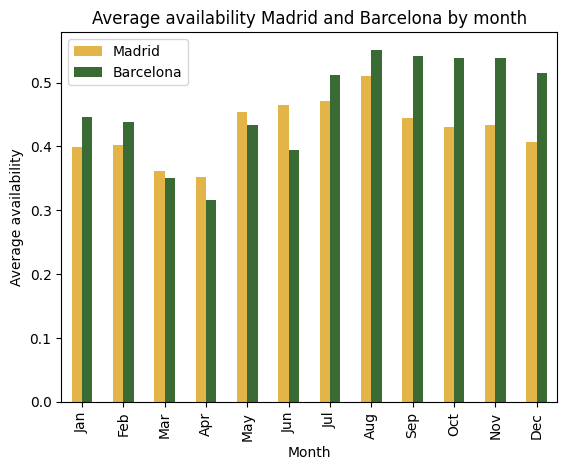

In [30]:
vals_both_json = {'Madrid': vals_avail_md, 'Barcelona': vals_avail_bc}
vals_both_df = pd.DataFrame(vals_both_json)
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average availability")
plt.xlabel("Month")
plt.title("Average availability Madrid and Barcelona by month")

# Price insights

**Prices by month**

In [31]:
vals_price_bc = df_calendar_bc.groupby(['month'])['price'].mean()
vals_price_bc = vals_price_bc.rename(index=months)
vals_price_bc

month
Jan    118.066338
Feb    124.567293
Mar    113.702214
Apr    112.880344
May    116.813436
Jun    134.888494
Jul    125.563818
Aug    129.146625
Sep    120.447410
Oct    115.383826
Nov    103.704330
Dec    110.259324
Name: price, dtype: float64

In [32]:
vals_price_md = df_calendar_md.groupby(['month'])['price'].mean()
vals_price_md = vals_price_md.rename(index=months)
vals_price_md

month
Jan    114.367332
Feb    114.589679
Mar    113.500294
Apr    115.221364
May    112.870267
Jun    116.841186
Jul    113.473144
Aug    107.790952
Sep    115.005631
Oct    117.695255
Nov    109.380223
Dec    115.981244
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices in Madrid and Barcelona by month')

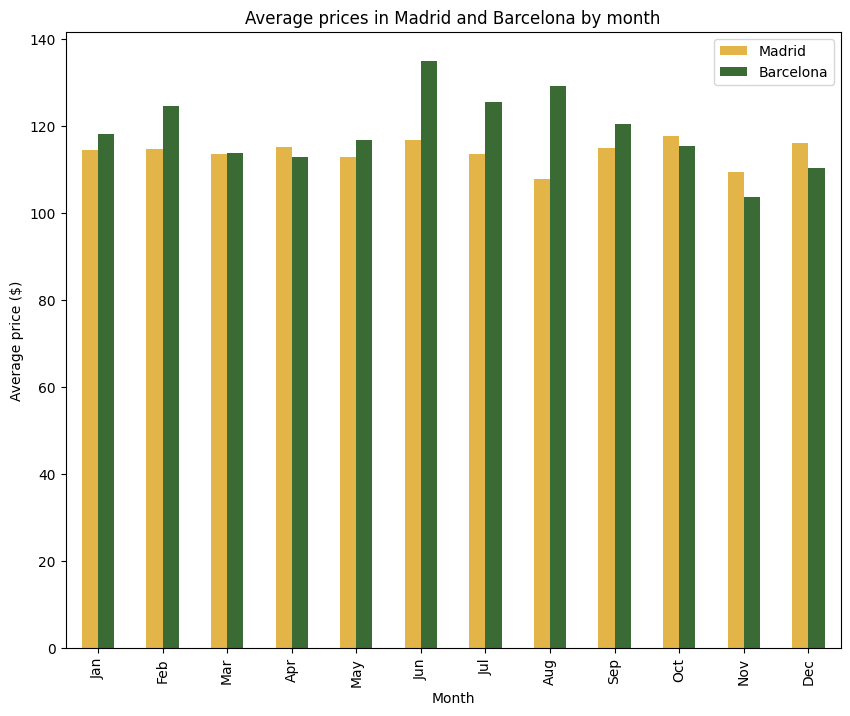

In [33]:
vals_both_json = {'Madrid': vals_price_md, 'Barcelona': vals_price_bc}
vals_both_df = pd.DataFrame(vals_both_json)

plt.rcParams['figure.figsize'] = [10, 8]
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average price ($)")
plt.xlabel("Month")
plt.title("Average prices in Madrid and Barcelona by month")

**Price per month for studios**

In [34]:
df_calendar_studios_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 0, :].dropna(subset='date')
vals_price_studios_md = df_calendar_studios_md.groupby(['month'])['price'].mean()
vals_price_studios_md = vals_price_studios_md.rename(index=months)
vals_price_studios_md

month
Jan    87.973325
Feb    89.142084
Mar    90.762257
Apr    85.044561
May    84.087520
Jun    84.285776
Jul    83.894081
Aug    82.965241
Sep    85.399148
Oct    85.361616
Nov    83.282394
Dec    85.023014
Name: price, dtype: float64

In [35]:
df_calendar_studios_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 0, :].dropna(subset='date')
vals_price_studios_bc = df_calendar_studios_bc.groupby(['month'])['price'].mean()
vals_price_studios_bc = vals_price_studios_bc.rename(index=months)
vals_price_studios_bc

month
Jan    79.445909
Feb    84.328443
Mar    77.819267
Apr    70.667562
May    71.578483
Jun    75.526083
Jul    72.649171
Aug    74.096475
Sep    73.120451
Oct    71.595239
Nov    67.850695
Dec    68.814119
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices for studios in Madrid and Barcelona by month')

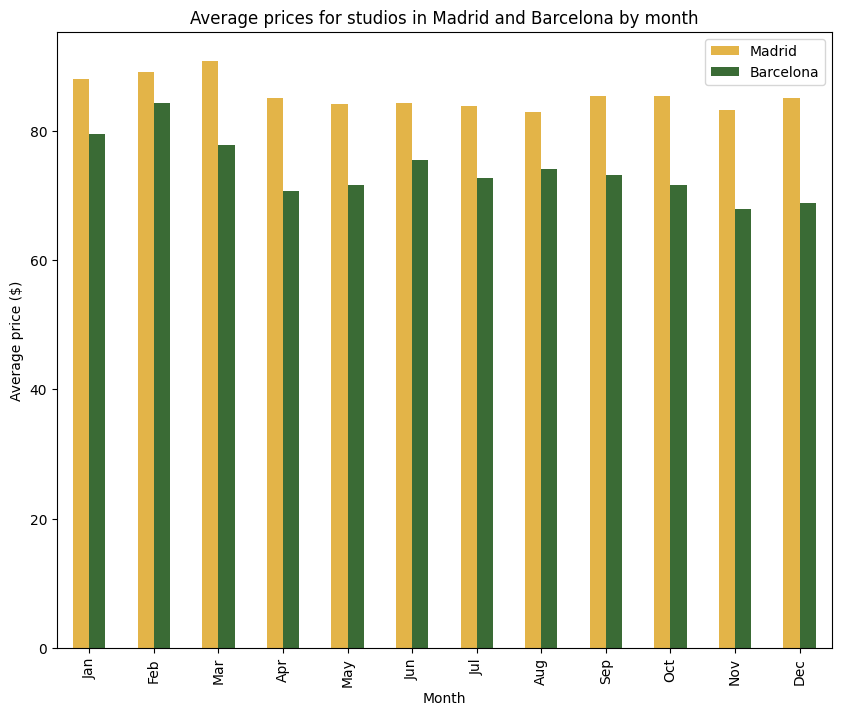

In [36]:
vals_both_json = {'Madrid': vals_price_studios_md, 'Barcelona': vals_price_studios_bc}
vals_both_df = pd.DataFrame(vals_both_json)
plt.rcParams['figure.figsize'] = [10, 8]
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average price ($)")
plt.xlabel("Month")
plt.title("Average prices for studios in Madrid and Barcelona by month")

**Price per month for 1 bedroom**

In [37]:
df_calendar_1bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 1, :].dropna(subset='date')
vals_price_1bedr_md = df_calendar_1bedr_md.groupby(['month'])['price'].mean()
vals_price_1bedr_md = vals_price_1bedr_md.rename(index=months)
vals_price_1bedr_md

month
Jan    115.318540
Feb    114.703075
Mar    107.088013
Apr    113.415913
May    110.597699
Jun    117.299287
Jul    112.620232
Aug    105.227312
Sep    114.760273
Oct    118.740887
Nov    107.775124
Dec    116.101497
Name: price, dtype: float64

In [38]:
df_calendar_1bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 1, :].dropna(subset='date')
vals_price_1bedr_bc = df_calendar_1bedr_bc.groupby(['month'])['price'].mean()
vals_price_1bedr_bc = vals_price_1bedr_bc.rename(index=months)
vals_price_1bedr_bc

month
Jan    126.389182
Feb    137.459213
Mar    114.041437
Apr    117.089836
May    120.053169
Jun    140.757850
Jul    131.058722
Aug    135.207229
Sep    125.662992
Oct    120.336643
Nov    108.239591
Dec    116.040459
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices for 1 bedroom in Madrid and Barcelona by month')

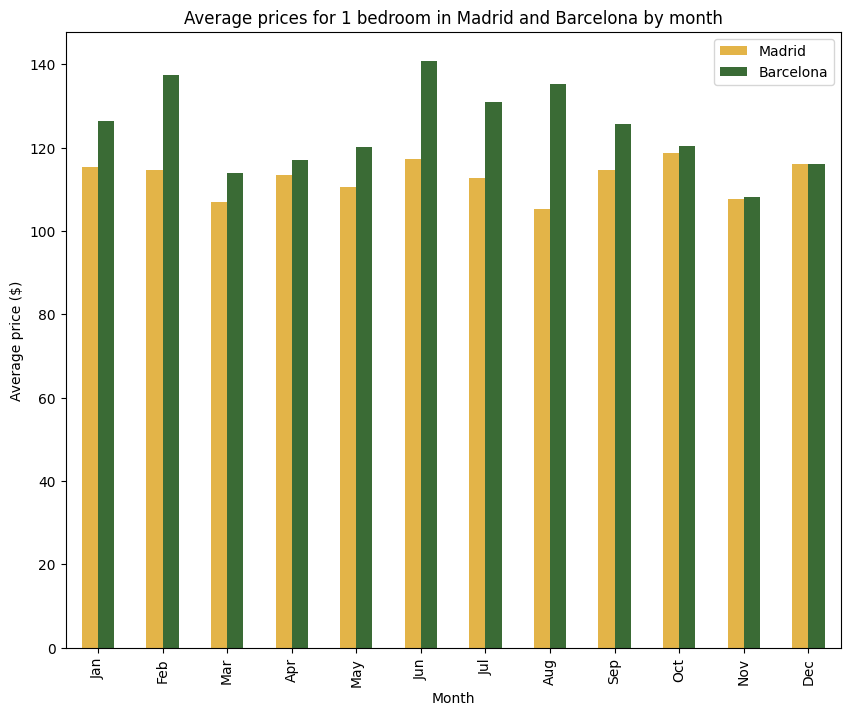

In [39]:
vals_both_json = {'Madrid': vals_price_1bedr_md, 'Barcelona': vals_price_1bedr_bc}
vals_both_df = pd.DataFrame(vals_both_json)
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average price ($)")
plt.xlabel("Month")
plt.title("Average prices for 1 bedroom in Madrid and Barcelona by month")

**Prices per month for 2 bedrooms**

In [40]:
df_calendar_2bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 2, :].dropna(subset='date')
vals_price_2bedr_md = df_calendar_2bedr_md.groupby(['month'])['price'].mean()
vals_price_2bedr_md = vals_price_2bedr_md.rename(index=months)
vals_price_2bedr_md

month
Jan    153.775231
Feb    153.037595
Mar    148.951804
Apr    160.761481
May    156.410722
Jun    164.814091
Jul    157.694945
Aug    146.337309
Sep    159.654676
Oct    165.432400
Nov    150.455497
Dec    164.151161
Name: price, dtype: float64

In [41]:
df_calendar_2bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 2, :].dropna(subset='date')
vals_price_2bedr_bc = df_calendar_2bedr_bc.groupby(['month'])['price'].mean()
vals_price_2bedr_bc = vals_price_2bedr_bc.rename(index=months)
vals_price_2bedr_bc

month
Jan    157.997924
Feb    165.288117
Mar    142.619223
Apr    154.273458
May    160.340964
Jun    193.537574
Jul    177.115569
Aug    182.957913
Sep    166.522275
Oct    157.230067
Nov    137.275362
Dec    149.380159
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices for 2 bedrooms in Madrid and Barcelona by month')

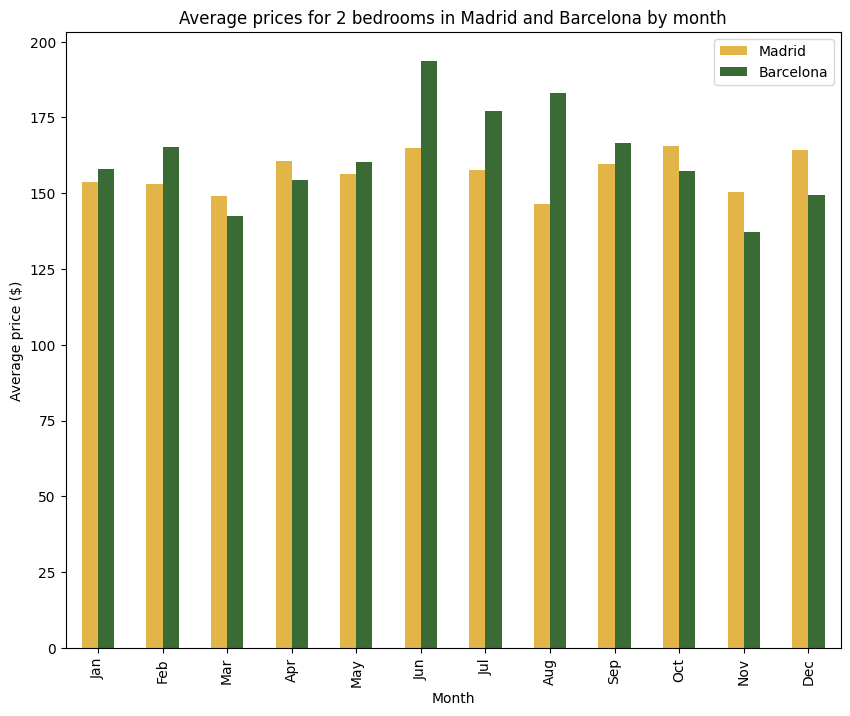

In [42]:
vals_both_json = {'Madrid': vals_price_2bedr_md, 'Barcelona': vals_price_2bedr_bc}
vals_both_df = pd.DataFrame(vals_both_json)
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average price ($)")
plt.xlabel("Month")
plt.title("Average prices for 2 bedrooms in Madrid and Barcelona by month")

**Prices per month for 3 bedrooms**

In [69]:
df_calendar_3bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 3, :].dropna(subset='date')
vals_price_3bedr_md = df_calendar_3bedr_md.groupby(['month'])['price'].mean()
vals_price_3bedr_md = vals_price_3bedr_md.rename(index=months)
vals_price_3bedr_md

month
Jan    196.571973
Feb    196.430813
Mar    195.884985
Apr    215.408415
May    210.771830
Jun    219.699008
Jul    211.416723
Aug    194.819430
Sep    209.267065
Oct    217.377539
Nov    194.359800
Dec    208.852959
Name: price, dtype: float64

In [70]:
df_calendar_3bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 3, :].dropna(subset='date')
vals_price_3bedr_bc = df_calendar_3bedr_bc.groupby(['month'])['price'].mean()
vals_price_3bedr_bc = vals_price_3bedr_bc.rename(index=months)
vals_price_3bedr_bc

month
Jan    197.700098
Feb    205.256301
Mar    176.969253
Apr    198.444646
May    210.984181
Jun    255.698697
Jul    232.758628
Aug    240.473088
Sep    216.081756
Oct    204.983297
Nov    177.688117
Dec    195.259566
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices for 3 bedrooms in Madrid and Barcelona by month')

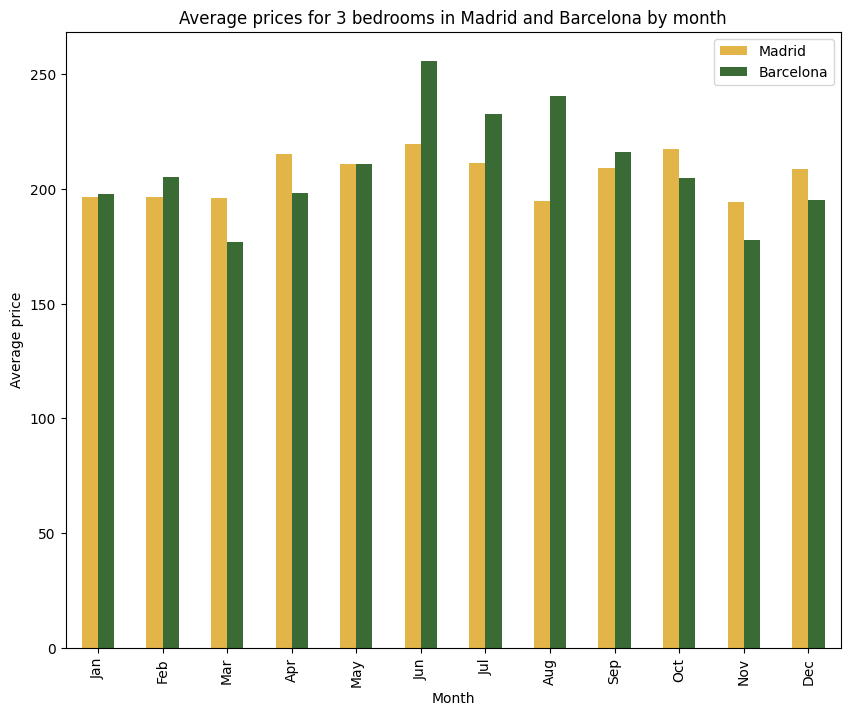

In [71]:
vals_both_json = {'Madrid': vals_price_3bedr_md, 'Barcelona': vals_price_3bedr_bc}
vals_both_df = pd.DataFrame(vals_both_json)
vals_both_df.plot(kind="bar", color=['#E3B448', '#3A6B35'])
plt.ylabel("Average price")
plt.xlabel("Month")
plt.title("Average prices for 3 bedrooms in Madrid and Barcelona by month")

**Prices per month for studio, 1 bedroom, 2 bedrooms, 3 bedrooms**

Text(0.5, 1.0, 'Average prices for all property types in Madrid by month')

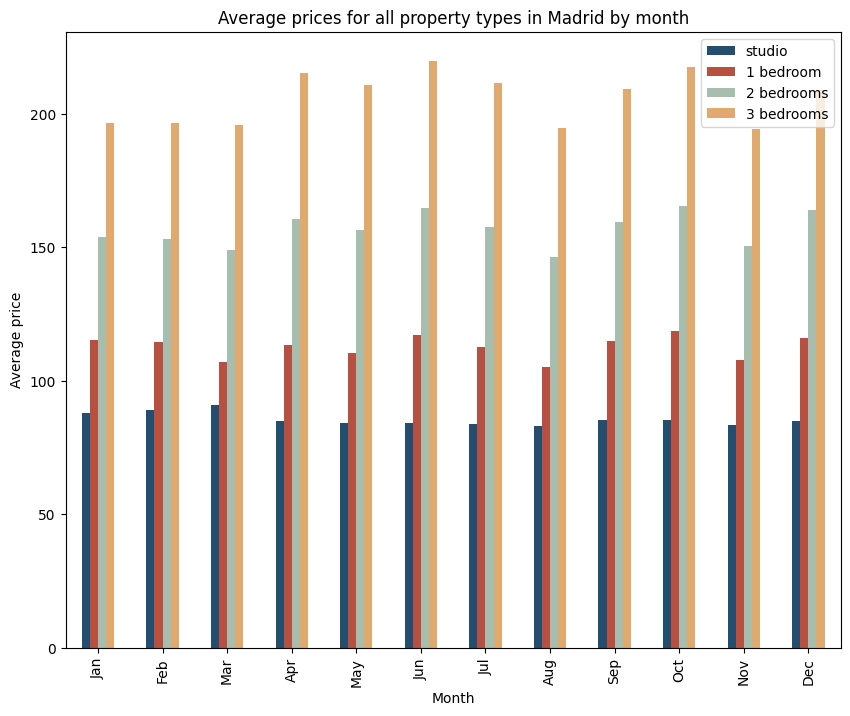

In [46]:
vals_all_json = {'studio': vals_price_studios_md, '1 bedroom': vals_price_1bedr_md, '2 bedrooms': vals_price_2bedr_md, '3 bedrooms': vals_price_3bedr_md}
vals_all_df = pd.DataFrame(vals_all_json)
vals_all_df.plot(kind="bar", color=["#234E70", "#B85042", "#A7BEAE", "#E0A96D"])
plt.ylabel("Average price")
plt.xlabel("Month")
plt.title("Average prices for all property types in Madrid by month")


Text(0.5, 1.0, 'Average prices for all property types in Barcelona by month')

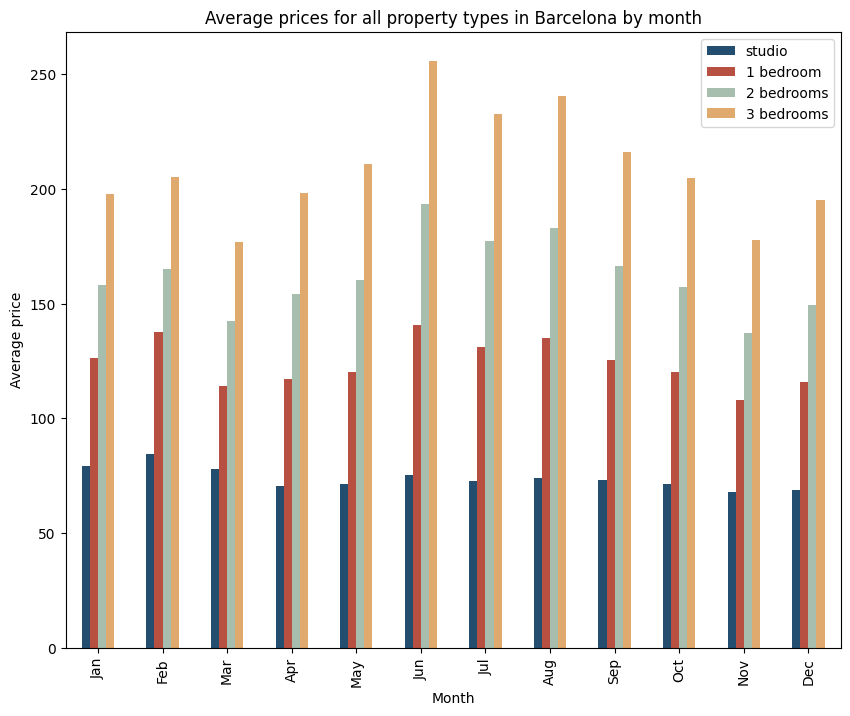

In [47]:
vals_all_json = {'studio': vals_price_studios_bc, '1 bedroom': vals_price_1bedr_bc, '2 bedrooms': vals_price_2bedr_bc, '3 bedrooms': vals_price_3bedr_bc}
vals_all_df = pd.DataFrame(vals_all_json)
vals_all_df.plot(kind="bar", color=["#234E70", "#B85042", "#A7BEAE", "#E0A96D"])
plt.ylabel("Average price")
plt.xlabel("Month")
plt.title("Average prices for all property types in Barcelona by month")


## Let's use the latitude and the longitude

## Madrid

**Create scatter plot and city zones**

Text(0.5, 1.0, 'Zones in Madrid')

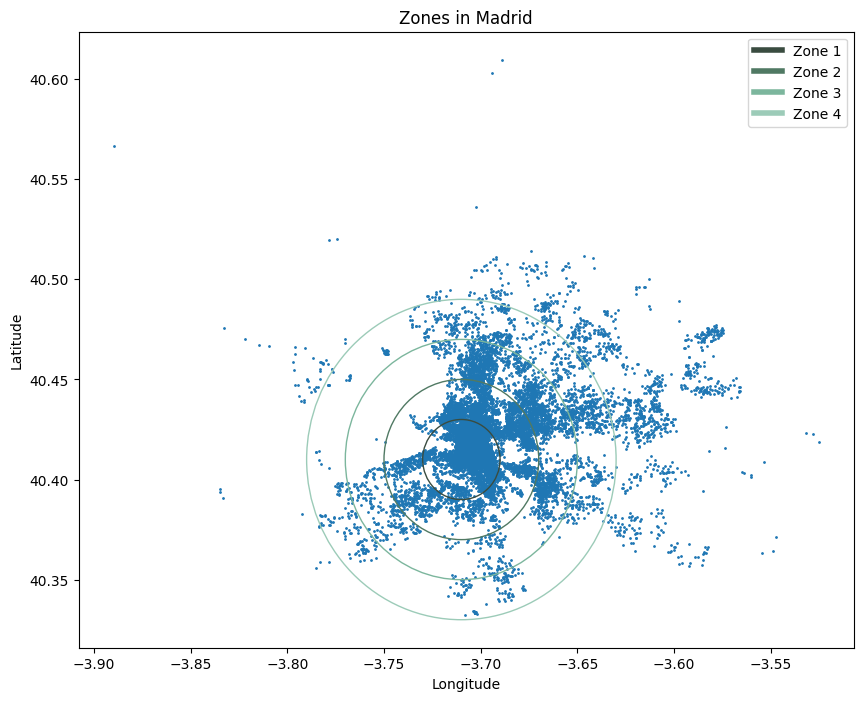

In [48]:
radius1 = 0.02
radius2 = 0.04
radius3 = 0.06
radius4 = 0.08
center = [-3.71, 40.41]

plt.scatter(df_listings_md['longitude'], df_listings_md['latitude'], s=1)
circle1 = plt.Circle((center[0], center[1]), radius=radius1, color='#3a4c40', fill=False, linewidth=1)
circle2 = plt.Circle((center[0], center[1]), radius=radius2, color='#507963', fill=False, linewidth=1)
circle3 = plt.Circle((center[0], center[1]), radius=radius3, color='#7cb69d', fill=False, linewidth=1)
circle4 = plt.Circle((center[0], center[1]), radius=radius4, color='#9ccbb8', fill=False, linewidth=1)
plt.gca().add_patch(circle2);
plt.gca().add_patch(circle1);
plt.gca().add_patch(circle3);
plt.gca().add_patch(circle4);

cmap = plt.cm.coolwarm
custom_lines = [plt.Line2D([0], [0], color='#3a4c40', lw=4),
                plt.Line2D([0], [0], color='#507963', lw=4),
                plt.Line2D([0], [0], color='#7cb69d', lw=4),
                plt.Line2D([0], [0], color='#9ccbb8', lw=4)]
plt.legend(custom_lines, ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Zones in Madrid")

**Add latitude and longitude columns to calendar df**

In [49]:
# verify not nulls
df_listings_md['longitude'].isnull().sum()
df_listings_bc['longitude'].isnull().sum()
df_listings_md['latitude'].isnull().sum()
df_listings_bc['latitude'].isnull().sum()

0

In [50]:
df_listings_latitude_longitude_md = df_listings_md.loc[:, ['latitude', 'longitude', 'id']].rename(columns={'id': 'listing_id'})
df_calendar_md = pd.merge(df_calendar_md, df_listings_latitude_longitude_md, how='inner', on="listing_id")

**Calculate and create zone column**

In [51]:
def calculateZone(x):
    distance = np.sqrt((x['longitude']-center[0])**2 + (x['latitude']-center[1])**2)
    if (distance > radius4):
        return 5;
    elif (distance > radius3):
        return 4;
    elif (distance > radius2):
        return 3;
    elif (distance > radius1):
        return 2;
    else:
        return 1;

In [52]:
df_calendar_md['zone'] = df_calendar_md.apply(calculateZone, axis=1)

In [53]:
zones = {
    '1': 'Zone1',
    '2': 'Zone2',
    '3': 'Zone3',
    '4': 'Zone4',
    '5': 'Zone5'
}

In [54]:
df_calendar_studios_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 0, :].dropna(subset='date')
vals_price_studios_md = df_calendar_studios_md.groupby(['zone'])['price'].mean()
vals_price_studios_md = vals_price_studios_md.rename(index=zones)
vals_price_studios_md

zone
1     85.233692
2     70.944260
3     72.366023
4     77.978759
5    148.551900
Name: price, dtype: float64

In [55]:
df_calendar_1bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 1, :].dropna(subset='date')
vals_price_1bedr_md = df_calendar_1bedr_md.groupby(['zone'])['price'].mean()
vals_price_1bedr_md = vals_price_1bedr_md.rename(index=zones)
vals_price_1bedr_md

zone
1    113.084296
2    111.459481
3    116.260761
4     90.450572
5    126.214727
Name: price, dtype: float64

In [56]:
df_calendar_2bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 2, :].dropna(subset='date')
vals_price_2bedr_md = df_calendar_2bedr_md.groupby(['zone'])['price'].mean()
vals_price_2bedr_md = vals_price_2bedr_md.rename(index=zones)
vals_price_2bedr_md

zone
1    161.306645
2    164.063915
3    133.435960
4    125.292490
5    169.089148
Name: price, dtype: float64

In [57]:
df_calendar_3bedr_md = df_calendar_md.loc[df_calendar_md['bedrooms'] == 3, :].dropna(subset='date')
vals_price_3bedr_md = df_calendar_3bedr_md.groupby(['zone'])['price'].mean()
vals_price_3bedr_md = vals_price_3bedr_md.rename(index=zones)
vals_price_3bedr_md

zone
1    224.085333
2    215.838536
3    167.151318
4    166.612953
5    158.316614
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices by city zone in Madrid')

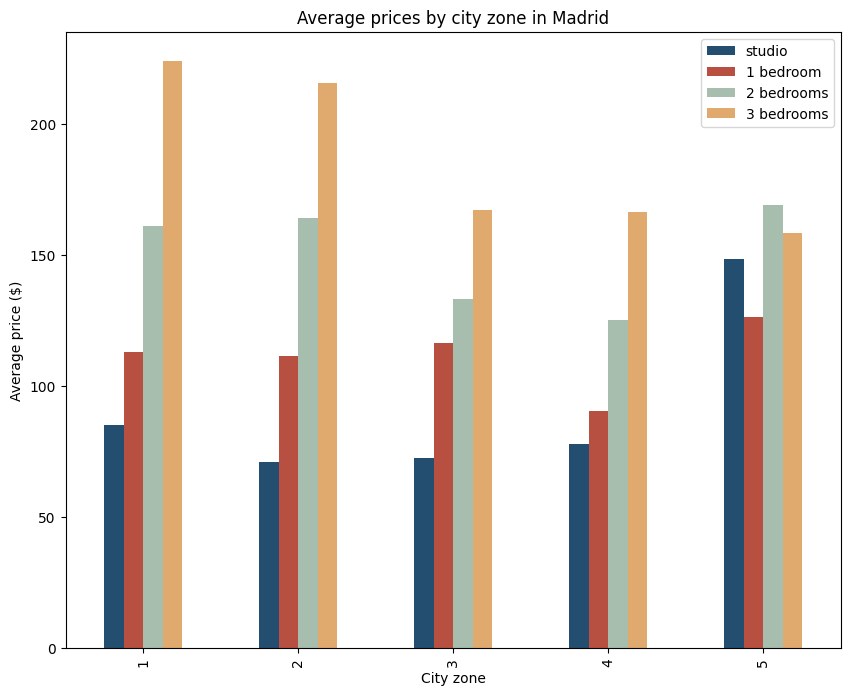

In [58]:
vals_all_json = {'studio': vals_price_studios_md, '1 bedroom': vals_price_1bedr_md, '2 bedrooms': vals_price_2bedr_md, '3 bedrooms': vals_price_3bedr_md}
vals_all_df = pd.DataFrame(vals_all_json)
vals_all_df.plot(kind="bar", color=["#234E70", "#B85042", "#A7BEAE", "#E0A96D"])
plt.ylabel("Average price ($)")
plt.xlabel("City zone")
plt.title("Average prices by city zone in Madrid")


## Barcelona

**Create scatter plot and city zones**

Text(0.5, 1.0, 'Zones in Barcelona')

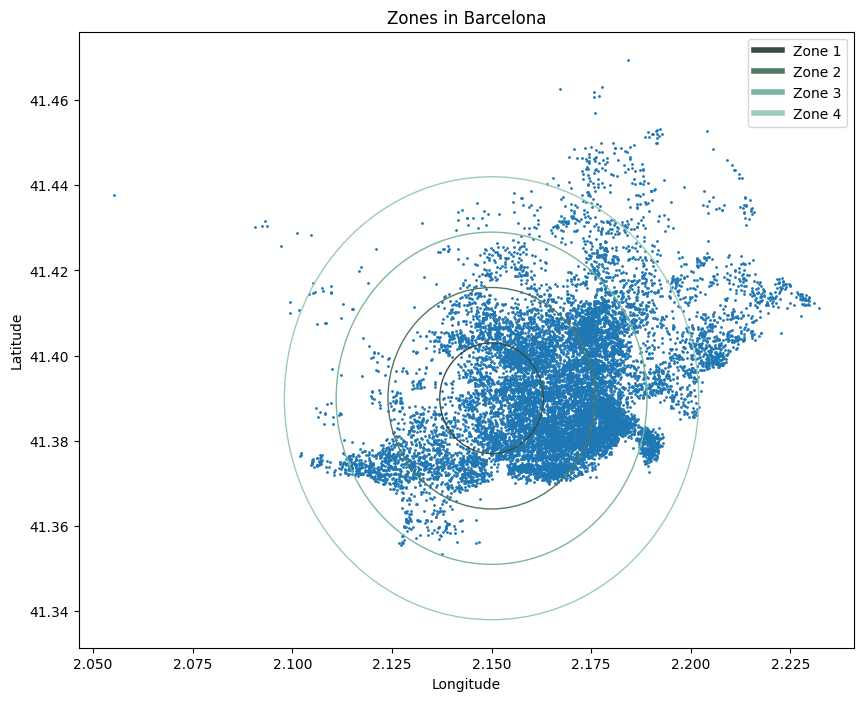

In [59]:
radius1 = 0.013
radius2 = 0.026
radius3 = 0.039
radius4 = 0.052
center = [2.15, 41.39]

plt.scatter(df_listings_bc['longitude'], df_listings_bc['latitude'], s=1)
circle1 = plt.Circle((center[0], center[1]), radius=radius1, color='#3a4c40', fill=False, linewidth=1)
circle2 = plt.Circle((center[0], center[1]), radius=radius2, color='#507963', fill=False, linewidth=1)
circle3 = plt.Circle((center[0], center[1]), radius=radius3, color='#7cb69d', fill=False, linewidth=1)
circle4 = plt.Circle((center[0], center[1]), radius=radius4, color='#9ccbb8', fill=False, linewidth=1)
plt.gca().add_patch(circle2);
plt.gca().add_patch(circle1);
plt.gca().add_patch(circle3);
plt.gca().add_patch(circle4);

cmap = plt.cm.coolwarm
custom_lines = [plt.Line2D([0], [0], color='#3a4c40', lw=4),
                plt.Line2D([0], [0], color='#507963', lw=4),
                plt.Line2D([0], [0], color='#7cb69d', lw=4),
                plt.Line2D([0], [0], color='#9ccbb8', lw=4)]
plt.legend(custom_lines, ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Zones in Barcelona")

In [60]:
# verify not nulls
df_listings_md['longitude'].isnull().sum()
df_listings_bc['longitude'].isnull().sum()
df_listings_md['latitude'].isnull().sum()
df_listings_bc['latitude'].isnull().sum()

0

In [61]:
df_listings_latitude_longitude_bc = df_listings_bc.loc[:, ['latitude', 'longitude', 'id']].rename(columns={'id': 'listing_id'})
df_calendar_bc = pd.merge(df_calendar_bc, df_listings_latitude_longitude_bc, how='inner', on="listing_id")


In [62]:
df_calendar_bc['zone'] = df_calendar_bc.apply(calculateZone, axis=1)

In [63]:
df_calendar_studios_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 0, :].dropna(subset='date')
vals_price_studios_bc = df_calendar_studios_bc.groupby(['zone'])['price'].mean()
vals_price_studios_bc = vals_price_studios_bc.rename(index=zones)
vals_price_studios_bc

zone
1    84.287817
2    81.434139
3    68.466250
4    57.490982
5    46.760052
Name: price, dtype: float64

In [64]:
df_calendar_1bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 1, :].dropna(subset='date')
vals_price_1bedr_bc = df_calendar_1bedr_bc.groupby(['zone'])['price'].mean()
vals_price_1bedr_bc = vals_price_1bedr_bc.rename(index=zones)
vals_price_1bedr_bc

zone
1    143.411886
2    127.279420
3    111.366850
4    108.993240
5    147.502994
Name: price, dtype: float64

In [65]:
df_calendar_2bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 2, :].dropna(subset='date')
vals_price_2bedr_bc = df_calendar_2bedr_bc.groupby(['zone'])['price'].mean()
vals_price_2bedr_bc = vals_price_2bedr_bc.rename(index=zones)
vals_price_2bedr_bc

zone
1    173.628154
2    172.215801
3    146.115091
4    143.813178
5    149.651316
Name: price, dtype: float64

In [66]:
df_calendar_3bedr_bc = df_calendar_bc.loc[df_calendar_bc['bedrooms'] == 3, :].dropna(subset='date')
vals_price_3bedr_bc = df_calendar_3bedr_bc.groupby(['zone'])['price'].mean()
vals_price_3bedr_bc = vals_price_3bedr_bc.rename(index=zones)
vals_price_3bedr_bc

zone
1    218.502702
2    226.707690
3    195.621187
4    181.632628
5    188.511766
Name: price, dtype: float64

Text(0.5, 1.0, 'Average prices by city zone in Barcelona')

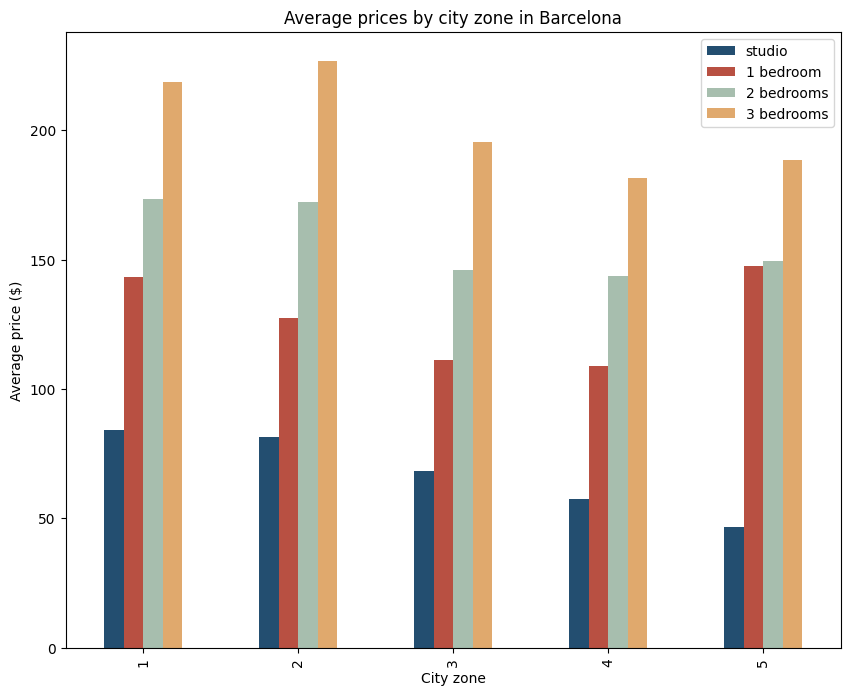

In [67]:
vals_all_json = {'studio': vals_price_studios_bc, '1 bedroom': vals_price_1bedr_bc, '2 bedrooms': vals_price_2bedr_bc, '3 bedrooms': vals_price_3bedr_bc}
vals_all_df = pd.DataFrame(vals_all_json)
vals_all_df.plot(kind="bar", color=["#234E70", "#B85042", "#A7BEAE", "#E0A96D"])
plt.ylabel("Average price ($)")
plt.xlabel("City zone")
plt.title("Average prices by city zone in Barcelona")
